In [55]:
import numpy as np
import pandas as pd
import main
las_data = pd.read_csv(main.csv_las_out_full_path, delimiter=';')
las_data.head()

,well_name,STRT,STOP,DEPT,aps,rp,kp,kgl,kpr,kvo,kng,lit,satur,UWI
0,224st4,2729.2,2929.4,2729.2,0.22,8.4,0.095,0.329,0.1,1.0,0.0,0.0,0.0,314_103ST2
1,224st4,2729.2,2929.4,2729.3,0.22,8.4,0.095,0.329,0.1,1.0,0.0,0.0,0.0,314_103ST2
2,224st4,2729.2,2929.4,2729.4,0.22,8.4,0.095,0.329,0.1,1.0,0.0,0.0,0.0,314_103ST2
3,224st4,2729.2,2929.4,2729.5,0.22,8.4,0.095,0.329,0.1,1.0,0.0,0.0,0.0,314_103ST2
4,224st4,2729.2,2929.4,2729.6,0.22,8.4,0.095,0.329,0.1,1.0,0.0,0.0,0.0,314_103ST2


In [56]:
del las_data['aps']
del las_data['STRT']
del las_data['STOP']
#del las_data['rp']
del las_data['kgl']
del las_data['kpr']
#del las_data['kvo']
del las_data['kng']
del las_data['lit']
del las_data['satur']
del las_data['kp']
las_data.head()

,well_name,DEPT,rp,kvo,UWI
0,224st4,2729.2,8.4,1.0,314_103ST2
1,224st4,2729.3,8.4,1.0,314_103ST2
2,224st4,2729.4,8.4,1.0,314_103ST2
3,224st4,2729.5,8.4,1.0,314_103ST2
4,224st4,2729.6,8.4,1.0,314_103ST2


In [57]:
las_data.replace('314_', '', regex=True, inplace=True)
#del las_data['well_name']
las_data = las_data.rename(columns={'well_name': 'WELL_NAME'})
las_data = las_data.rename(columns={'UWI': 'WELL_NAME_UWI'})
# las_data = las_data.rename(columns={'aps': 'APS'})
las_data = las_data.rename(columns={'kvo': 'KVO'})
las_data = las_data.rename(columns={'rp': 'RP'})
las_data = las_data.rename(columns={'satur': 'SAT'})
las_data = las_data.rename(columns={'DEPT': 'DEPTH'})
las_data.head(n=2)

,WELL_NAME,DEPTH,RP,KVO,WELL_NAME_UWI
0,224st4,2729.2,8.4,1.0,103ST2
1,224st4,2729.3,8.4,1.0,103ST2


In [58]:
real_top = pd.read_csv('real_data_test\\top_df.csv', delimiter=';')
real_top = real_top.rename(columns={'WELL_NAME': 'WELL_NAME_UWI'})
del real_top['X']
del real_top['Y']
real_top.head(n=2)

,WELL_NAME_UWI,DEPTH_TOP
0,100,2548.81
1,101,2556.23


In [59]:
real_bottom = pd.read_csv('real_data_test\\bottom_df.csv', delimiter=';')
real_bottom = real_bottom.rename(columns={'WELL_NAME': 'WELL_NAME_UWI'})
del real_bottom['X']
del real_bottom['Y']
real_bottom.head(n=2)

,WELL_NAME_UWI,DEPTH_BOTTOM
0,100,2564.81
1,101,2571.71


In [60]:
# данные от организаторов
water_content_data = pd.read_csv(main.data_dir + "\\water_content.csv", delimiter=';')
water_content_data = water_content_data.rename(columns={'Скважина': main.keys_dict[main.kid_well]})
water_content_data = water_content_data.rename(columns={' Начальная обводненность ': 'WC'})
water_content_data = water_content_data.rename(columns={'Дата запуска': 'date_start'})
del water_content_data['date_start']
water_content_data = water_content_data.rename(columns={'well_name': 'WELL_NAME'})
water_content_data.head(n=5)

,WELL_NAME,WC
0,380,0.49
1,379,0.30
2,370,0.13
3,417,0.08
4,389,0.22


In [7]:
# данные посчитанные на карте
wc_calc_data = pd.read_csv('fake_data\\map_wc_test_calc_res.csv', delimiter=';')
del wc_calc_data['Y']
del wc_calc_data['X']
wc_calc_data['WELL_NAME'] = wc_calc_data['WELL_NAME'].astype('str')
wc_calc_data = wc_calc_data.drop(wc_calc_data[wc_calc_data['WC'] > 1].index)
wc_calc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 166
Data columns (total 2 columns):
WELL_NAME    165 non-null object
WC           165 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [8]:
print(len(las_data['WELL_NAME'].value_counts()))
print(len(real_bottom['WELL_NAME_UWI'].value_counts()))
print(len(real_top['WELL_NAME_UWI'].value_counts()))
print(len(water_content_data['WELL_NAME'].value_counts()))
print(len(wc_calc_data['WELL_NAME'].value_counts()))

223
230
230
180
164


In [61]:
real_data = pd.merge(water_content_data, las_data, on='WELL_NAME')
#real_data = pd.merge(wc_calc_data, las_data, on='WELL_NAME')
real_data = pd.merge(real_data, real_top, on='WELL_NAME_UWI')
real_data = pd.merge(real_data, real_bottom, on='WELL_NAME_UWI') 
real_data.head()

,WELL_NAME,WC,DEPTH,RP,KVO,WELL_NAME_UWI,DEPTH_TOP,DEPTH_BOTTOM
0,380,0.49,2593.0,9.6,1.0,178,2560.32,2586.48
1,380,0.49,2593.1,9.6,1.0,178,2560.32,2586.48
2,380,0.49,2593.2,9.6,1.0,178,2560.32,2586.48
3,380,0.49,2593.3,9.6,1.0,178,2560.32,2586.48
4,380,0.49,2593.4,9.6,1.0,178,2560.32,2586.48


In [62]:
print(len(real_data['WELL_NAME'].value_counts()))
real_data.info()

166
<class 'pandas.core.frame.DataFrame'>
Int64Index: 342153 entries, 0 to 342152
Data columns (total 8 columns):
WELL_NAME        342153 non-null object
WC               342153 non-null float64
DEPTH            342153 non-null float64
RP               186585 non-null float64
KVO              182283 non-null float64
WELL_NAME_UWI    342153 non-null object
DEPTH_TOP        342153 non-null float64
DEPTH_BOTTOM     340224 non-null float64
dtypes: float64(6), object(2)
memory usage: 23.5+ MB


In [63]:
real_data_na = real_data.dropna()
print(len(real_data['WELL_NAME'].value_counts()))
real_data.info()

166
<class 'pandas.core.frame.DataFrame'>
Int64Index: 342153 entries, 0 to 342152
Data columns (total 8 columns):
WELL_NAME        342153 non-null object
WC               342153 non-null float64
DEPTH            342153 non-null float64
RP               186585 non-null float64
KVO              182283 non-null float64
WELL_NAME_UWI    342153 non-null object
DEPTH_TOP        342153 non-null float64
DEPTH_BOTTOM     340224 non-null float64
dtypes: float64(6), object(2)
memory usage: 23.5+ MB


In [65]:
import lasio
import re
def load_and_convert_to_interp(dev_path, well_name):
    f = open(dev_path + well_name + '.dev', 'r')
    well_num = 0
    md = []
    abs = []
    for line in f.readlines():
        if well_num > 16:
            # list = line.split(' ')
            # print(list)
            numbers = re.findall(r'[-]?[0-9]+.[0-9]+', line)
            md.append(float(numbers[0]))
            abs.append(float(numbers[3]))
        well_num = well_num +1
    f.close()
    f_spline = interpolate.interp1d(abs, md, kind = 'slinear', bounds_error=False)
    return f_spline

Загружаем переход от md в abs

In [66]:
from scipy import interpolate
dev_path = "..\\tasks\\task 6\\data\\dev\\"
well_name_list = real_data_na['WELL_NAME_UWI'].value_counts().index.tolist()
well_name = well_name_list[0]
f_spline = load_and_convert_to_interp(dev_path, well_name)
print(f_spline(0))

107.8


In [81]:
from scipy import interpolate
well_name_list = real_data_na['WELL_NAME_UWI'].value_counts().index.tolist()
x_values = []
y_values = []
count_val = 100
well_count = 0
for well_name in well_name_list:
    if well_count%20 == 0:
        print(well_count, ' of ', len(well_name_list))
    data_well =  real_data_na[real_data_na['WELL_NAME_UWI'] == well_name]
    #print(len(data_well['KVO']))
    #print(min(data_well['DEPTH']), max(data_well['DEPTH']), len(data_well['DEPTH']))
    f_spline = load_and_convert_to_interp(dev_path, well_name)
    bottom = f_spline(data_well['DEPTH_BOTTOM'].tolist()[0])
    top = f_spline(data_well['DEPTH_TOP'].tolist()[0])
    print(top, bottom)
    data_well_by_bound = data_well[(data_well['DEPTH'] >= top) & (data_well['DEPTH'] <= bottom)]
    x_arr = data_well_by_bound['DEPTH']
    y_arr = data_well_by_bound['KVO']
    print(np.mean(data_well_by_bound['KVO']), data_well['WC'].tolist()[0])
    

        
    print ('length of array depth', len(x_arr))
    # print(len(x_arr), len(y_arr))
    if len(x_arr) < 10:
        continue
    f_spline = interpolate.interp1d(x_arr, y_arr, kind = 'slinear')
    h_start = data_well_by_bound['DEPTH'].min()
    h_end = data_well_by_bound['DEPTH'].max()
    # print(h_start, h_end, top, bottom)
    h_step = (h_end - h_start)/count_val
    x_temp = []
    i = 0
    
    # тест по kvo
    depth_list = data_well_by_bound['DEPTH'].tolist()
    kvo_list = data_well_by_bound['KVO'].tolist()
    rp_list = data_well_by_bound['RP'].tolist()
    i_len = len(data_well_by_bound['DEPTH'].tolist()) - 1
    sum1 = 0
    sum2 = 0
    delta_d = 0
    while (i < i_len):
        delta_d = depth_list[i + 1] - depth_list[i]
        sum1 = rp_list[i] * kvo_list[i] * delta_d
        sum2 = rp_list[i] * delta_d
        i = i + 1
    x_temp.append(sum1/sum2)
    
#     while(i < count_val):
#         x_temp.append(float(f_spline(h_start + i * h_step)))
#         i = i + 1

    # тест по среднему
    #x_temp.append(np.mean(data_well_by_bound['KVO']))
    x_values.append(x_temp)  
    y_values.append(data_well['WC'].tolist()[0])
    well_count = well_count + 1
print('end fill')

0  of  165
2656.5965965965966 2680.2002002002005
0.535093220339 0.08
length of array depth 236
3379.6004098360654 3401.402251791197
0.647824884793 0.4
length of array depth 217
3258.7971457696226 3279.7963340122196
0.687180952381 0.42
length of array depth 210
3067.1962616822434 3084.398340248963
0.82773255814 0.37
length of array depth 172
2871.396070320579 2887.004132231405
0.848243589744 0.16
length of array depth 156
3042.800808897877 3064.7979797979797
0.586520547945 0.22
length of array depth 219
2685.6000000000004 2709.2000000000003
0.830178723404 0.33
length of array depth 235
2745.997963340122 2761.802443991853
0.743735849057 0.24
length of array depth 159
2836.6020408163267 2854.1997961264024
1.0 0.26
length of array depth 175
3193.4008097165997 3210.0
0.88016969697 0.25
length of array depth 165
2705.2008032128515 2719.5983935742975
0.904055944056 0.3
length of array depth 143
3268.202034883721 3285.001128668171
1.0 0.51
length of array depth 334
3335.195586760281 3351.60320

In [82]:
len(y_values)

162

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

def data_analize_func(predict_for_analize, file_name = ''):
    # подготовка данных
    data_for_analize = predict_for_analize.sort_values(by=['y_hold'])
    data_for_analize['x_axis'] = [x for x in range(len(predict_for_analize['y_hold']))]
    data_for_analize.head()
    if file_name != '':
        data_for_analize.to_csv('AllGisParams/' + file_name, index=False, sep = ';')
    
    # построение графиков
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_predict'], color = 'blue')
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_hold'], color = 'red')
    plt.show()
    
    # regression metrics
    print('MSE                      = '+ str(mean_squared_error(data_for_analize['y_hold'], 
                                                                data_for_analize['y_predict'])))
    print('MAE                      = '+ str(mean_absolute_error(data_for_analize['y_hold'], 
                                                                 data_for_analize['y_predict'])))
    print('r2_score                 = '+ str(r2_score(data_for_analize['y_hold'], 
                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')
    print('explained_variance_score = '+ str(explained_variance_score(data_for_analize['y_hold'], 
                                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')

In [85]:
from sklearn.model_selection import train_test_split, StratifiedKFold
x_train, x_hold, y_train, y_hold = train_test_split(x_values, y_values, test_size=0.3, random_state=17)

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

forest_reg =  RandomForestRegressor(n_estimators=10 ,
                           oob_score=True,
                           random_state=17)

from sklearn.model_selection import GridSearchCV, cross_val_score
forest_params = { 
    'max_depth': [1, 10, 20, 40, 60],
    'n_estimators': [1, 10, 30, 50, 70, 100],
    'max_features': ['auto', 'sqrt', 'log2']
}

forest_grid = GridSearchCV(forest_reg, forest_params, cv=5, n_jobs=-1, verbose=True)
value_fit = forest_grid.fit(x_train, y_train) 
y_predict = forest_grid.predict(x_hold)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 345 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 443 out of 450 | elapsed:   11.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   12.1s finished
D:\libs\Anaconda\3.3\envs\aind\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


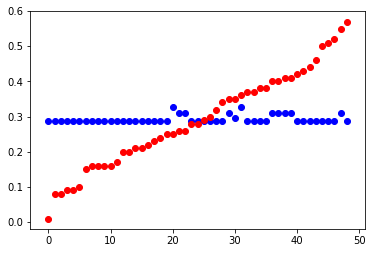

MSE                      = 0.0178921394552
MAE                      = 0.112514282864
r2_score                 = 0.0324369170638    (best_value is 1)
explained_variance_score = 0.0324631505729    (best_value is 1)


In [88]:
predict_for_analize_fake = pd.DataFrame({'y_hold':y_hold, 'y_predict':y_predict})
data_analize_func(predict_for_analize_fake)